In [17]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.errors_ = None
        self.w_ = None
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors +=  int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [18]:
import os
import pandas as pd

s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL:', s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [19]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


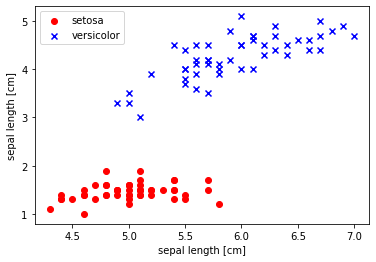

In [20]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal length [cm]')

plt.legend(loc='upper left')

plt.show()

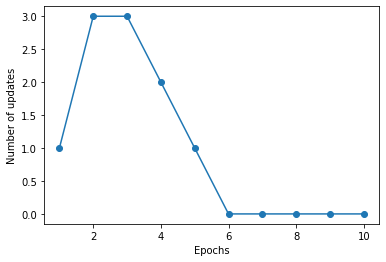

In [21]:
ppn  = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors  = ('red', 'blue', 'lightgreen', 'gray', 'cian')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/Users/layla/PycharmProjects/python-machine-learning-3rd-edition/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


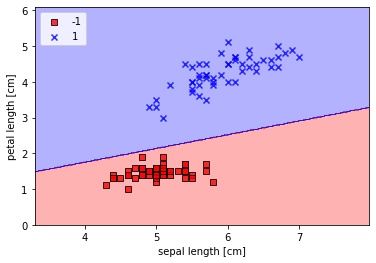

In [25]:
plot_decision_regions(X, y, classifier=ppn)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='upper left')

plt.show()

In [29]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.cost_ = None
        self.w_ = None
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

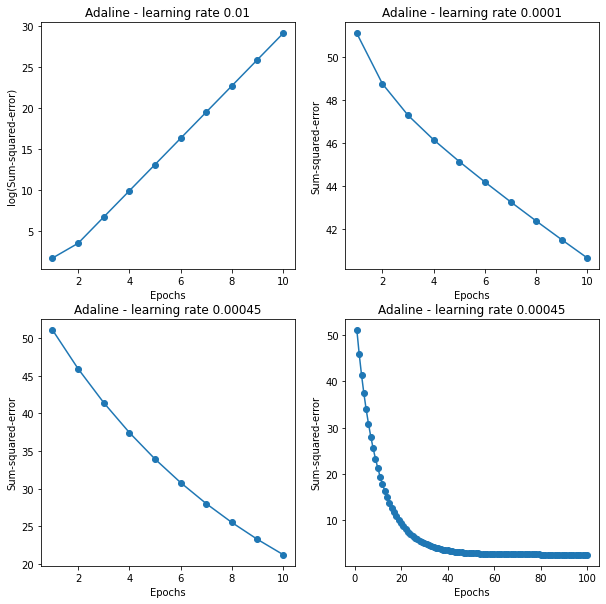

In [65]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0][0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')

ax[0][0].set_xlabel('Epochs')
ax[0][0].set_ylabel('log(Sum-squared-error)')

ax[0][0].set_title('Adaline - learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

ax[0][1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')

ax[0][1].set_xlabel('Epochs')
ax[0][1].set_ylabel('Sum-squared-error')

ax[0][1].set_title('Adaline - learning rate 0.0001')

ada3 = AdalineGD(n_iter=10, eta=0.00045).fit(X, y)

ax[1][0].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')

ax[1][0].set_xlabel('Epochs')
ax[1][0].set_ylabel('Sum-squared-error')

ax[1][0].set_title('Adaline - learning rate 0.00045')

ada4 = AdalineGD(n_iter=100, eta=0.00045).fit(X, y)

ax[1][1].plot(range(1, len(ada4.cost_) + 1), ada4.cost_, marker='o')

ax[1][1].set_xlabel('Epochs')
ax[1][1].set_ylabel('Sum-squared-error')

ax[1][1].set_title('Adaline - learning rate 0.00045')

plt.show()

In [67]:
print(ada4.cost_[-1])

2.544512375278511


/Users/layla/PycharmProjects/python-machine-learning-3rd-edition/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


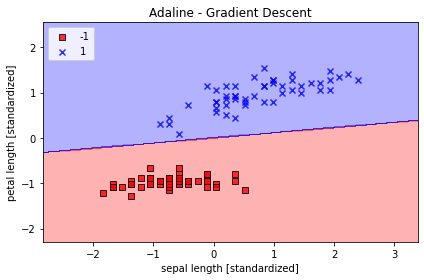

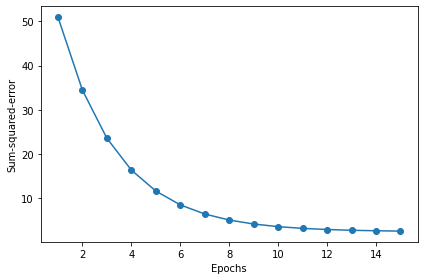

In [68]:
X_std = np.copy(X)

X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(n_iter=15, eta=0.01)

ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)

plt.title('Adaline - Gradient Descent')

plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

